# Metropolis Hastings
### Lehner White

In [1]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from scipy.stats import poisson,norm
from scipy import interpolate
from math import factorial
import random

% matplotlib inline

## Problem 2

In [2]:
def metro_poisson(T, lam=5, burn_in=1000):
    """ 
    Metropolis-Hastings algorithm for the Poisson distribution. 
    """
    def f(z):
        return lam**z * np.exp(-lam) / factorial(z)
    
    samples = np.empty(T, dtype=int)
    proposed_step = 1 - 2*np.random.randint(0,2, T)
    decision = np.random.uniform(0, 1, T)
    
    # random starting state
    samples[0] = random.randint(1, 10)
    
    for t in range(T-1):
        proposal = max(samples[t] + proposed_step[t], 1)
        
        if decision[t] >= f(proposal) / f(samples[t]):
            #rejected
            samples[t+1] = samples[t]
        else:
            #accepted
            samples[t+1] = proposal
            
    return samples[burn_in:]

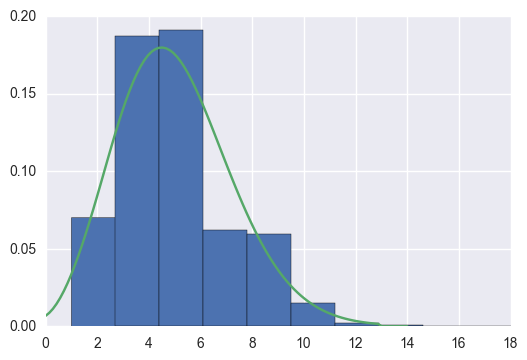

In [6]:
approx = metro_poisson(10**6, lam=5, burn_in=10**3)
plt.hist(approx, normed=True)

x = np.linspace(0,14,100)
y = interpolate.spline(xrange(0,14), poisson.pmf(xrange(0,14), 5), x)
plt.plot(x, y)

plt.show()

## Problem 3

In [4]:
def metro_normal(T,  burn_in=1000):
    """ 
    Metropolis-Hastings algorithm for the truncated normal distribution 
    on (0,1) with mu = 1/3 and sigma = 1/4.
    """
    
    def f(z):
        """ 
        Normal dist. with set parameters
        """
        mu = 1/3
        sigma = 1/4
        return 1./np.sqrt(2*np.pi*sigma) * np.exp(-((z-mu)**2)/(2*sigma**2))

    state = np.random.uniform(0, 1, T)
    rand_bin = np.random.uniform(0, 1, T)
    
    for t in range(T-1):
        if rand_bin[t] >= f(state[t+1]) / f(state[t]):
            state[t+1] = state[t]
            
    return state[burn_in:]

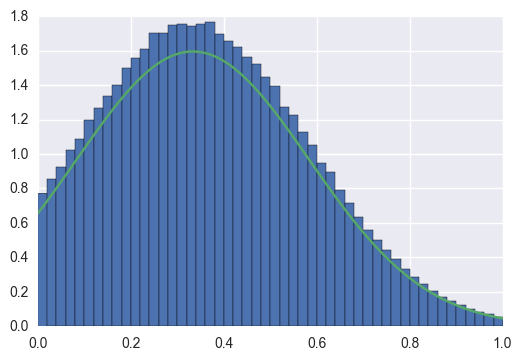

In [5]:
approx = metro_normal(10**6,  burn_in=10**3)
plt.hist(approx, bins=50, normed=True)

x = np.linspace(0,1,100)
y = norm.pdf(x, loc=1/3, scale=1/4)
plt.plot(x, y)

plt.show()